In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
dataset_train = pd.read_csv('../../data/modified/blogData_newTrain.csv')
dataset_test = pd.read_csv('../../data/modified/blogData_newTest.csv')

In [3]:
x_train = dataset_train.iloc[:,0:-1]
y_train = dataset_train.iloc[:,-1]

x_test = dataset_test.iloc[:, 0:-1]
y_test = dataset_test.iloc[:,-1]

In [4]:
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model_dt = DecisionTreeRegressor(random_state = 0)

init = time.time()
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)
print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(model_dt.score(x_test, y_test)))
print(cross_val_score(model_dt,x_test, y_test,scoring='r2'))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

Execution time: 1.3684475421905518 seconds
R2 score: -0.0964209705992296
[-0.14082393 -0.30310122  0.20934765]
MAE: 6.639932030758701


In [5]:
from sklearn.model_selection import cross_validate
cv = cross_validate(model_dt, x_test, y_test, cv=5)
print(cv)

{'test_score': array([-1.0707902 ,  0.03765771, -0.48363654,  0.13189446,  0.1013336 ]), 'fit_time': array([0.12989473, 0.12315154, 0.11289883, 0.12446213, 0.1397891 ]), 'train_score': array([0.99962699, 0.99974125, 0.99958355, 0.99993088, 0.99957055]), 'score_time': array([0.00094318, 0.00094819, 0.000947  , 0.00093865, 0.00092483])}


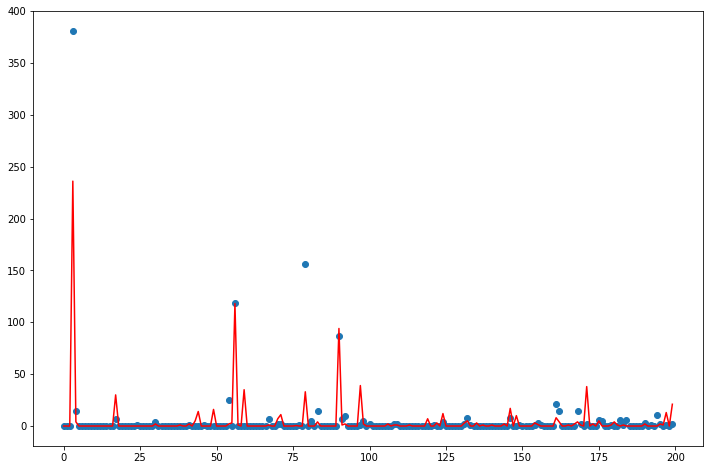

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200])
plt.plot(x, y_pred[:200], color='red')
plt.show()